Tarea: Proyecto I- Parte V (Core)

Nombre: Luciano Benjamín Recalde Carballo

#### Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

In [28]:
#Carga de datos
import pandas as pd
df = pd.read_csv('data/retail_sales_dataset4.csv')

In [29]:
column_interest = ["Age", "Price per Unit", "Quantity", "Total Amount"]
# Cálculo de la correlación de Pearson
correlation_matrix = df[[*column_interest]].corr(method='pearson')
print(correlation_matrix)
# Cálculo de la correlación de Spearman
spearman_corr = df[[*column_interest]].corr(method='spearman')
print(spearman_corr)
# Cálculo de la correlación de Kendall
kendall_corr = df[[*column_interest]].corr(method='kendall')
print(kendall_corr)

                     Age  Price per Unit  Quantity  Total Amount
Age             1.000000       -0.038423 -0.023737     -0.060568
Price per Unit -0.038423        1.000000  0.017501      0.851925
Quantity       -0.023737        0.017501  1.000000      0.373707
Total Amount   -0.060568        0.851925  0.373707      1.000000
                     Age  Price per Unit  Quantity  Total Amount
Age             1.000000       -0.037966 -0.023472     -0.037864
Price per Unit -0.037966        1.000000  0.024014      0.857439
Quantity       -0.023472        0.024014  1.000000      0.474103
Total Amount   -0.037864        0.857439  0.474103      1.000000
                     Age  Price per Unit  Quantity  Total Amount
Age             1.000000       -0.027979 -0.017853     -0.026288
Price per Unit -0.027979        1.000000  0.019210      0.724707
Quantity       -0.017853        0.019210  1.000000      0.401932
Total Amount   -0.026288        0.724707  0.401932      1.000000


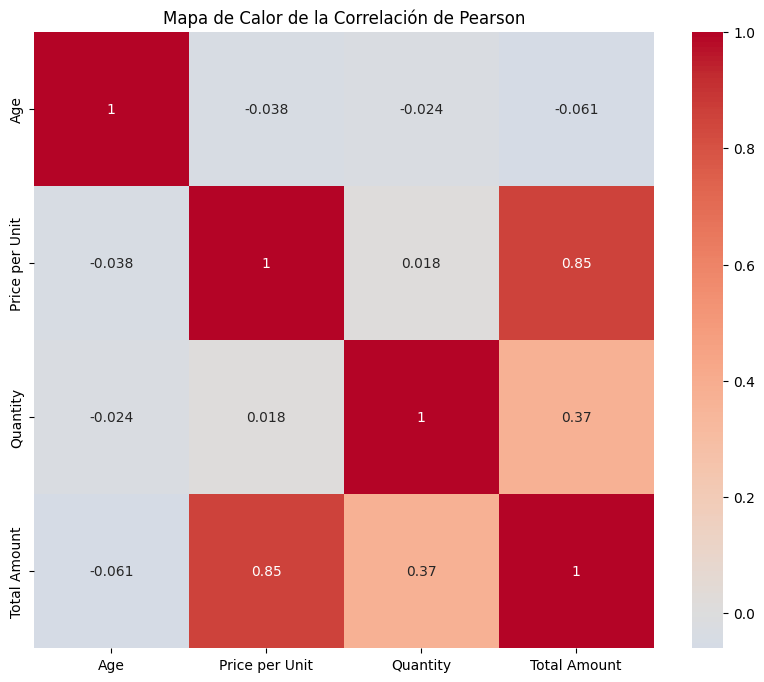

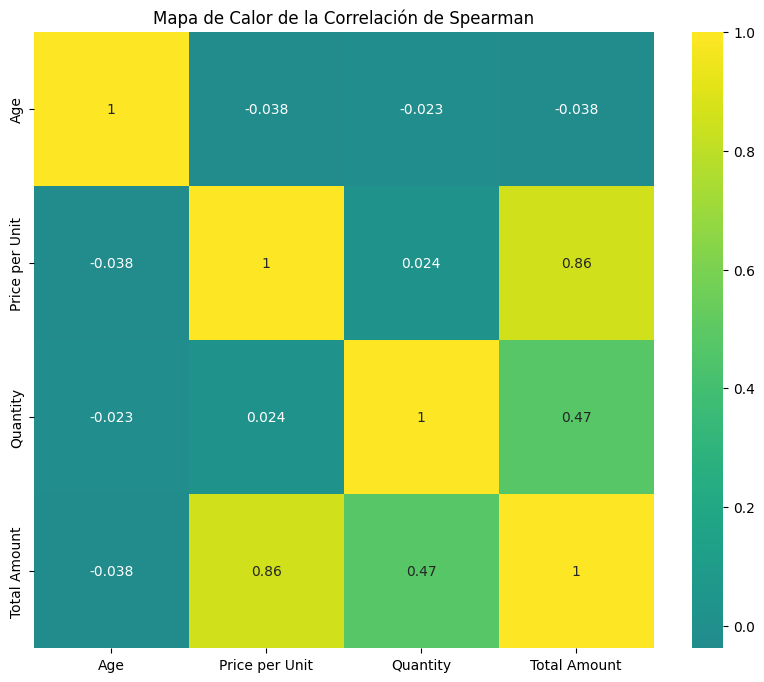

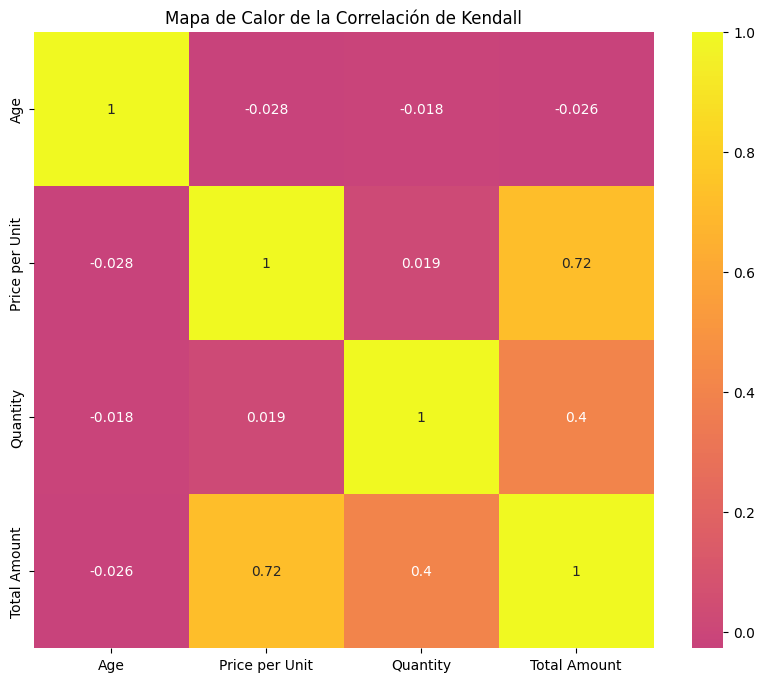

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear un mapa de calor para la matriz de correlación de Pearson
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()
# Crear un mapa de calor para la matriz de correlación de Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()
# Crear un mapa de calor para la matriz de correlación de Kendall
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()

No se observa datos muy importantes de correlacion, solamente entre los valores de cantidad, monto total y precio por unidad, pero es natural, ya que estas variables estan en funcion a las otras y el monto total se haya a traves de las otras 2.

#### Crea subplots para comparar diferentes variables clave.

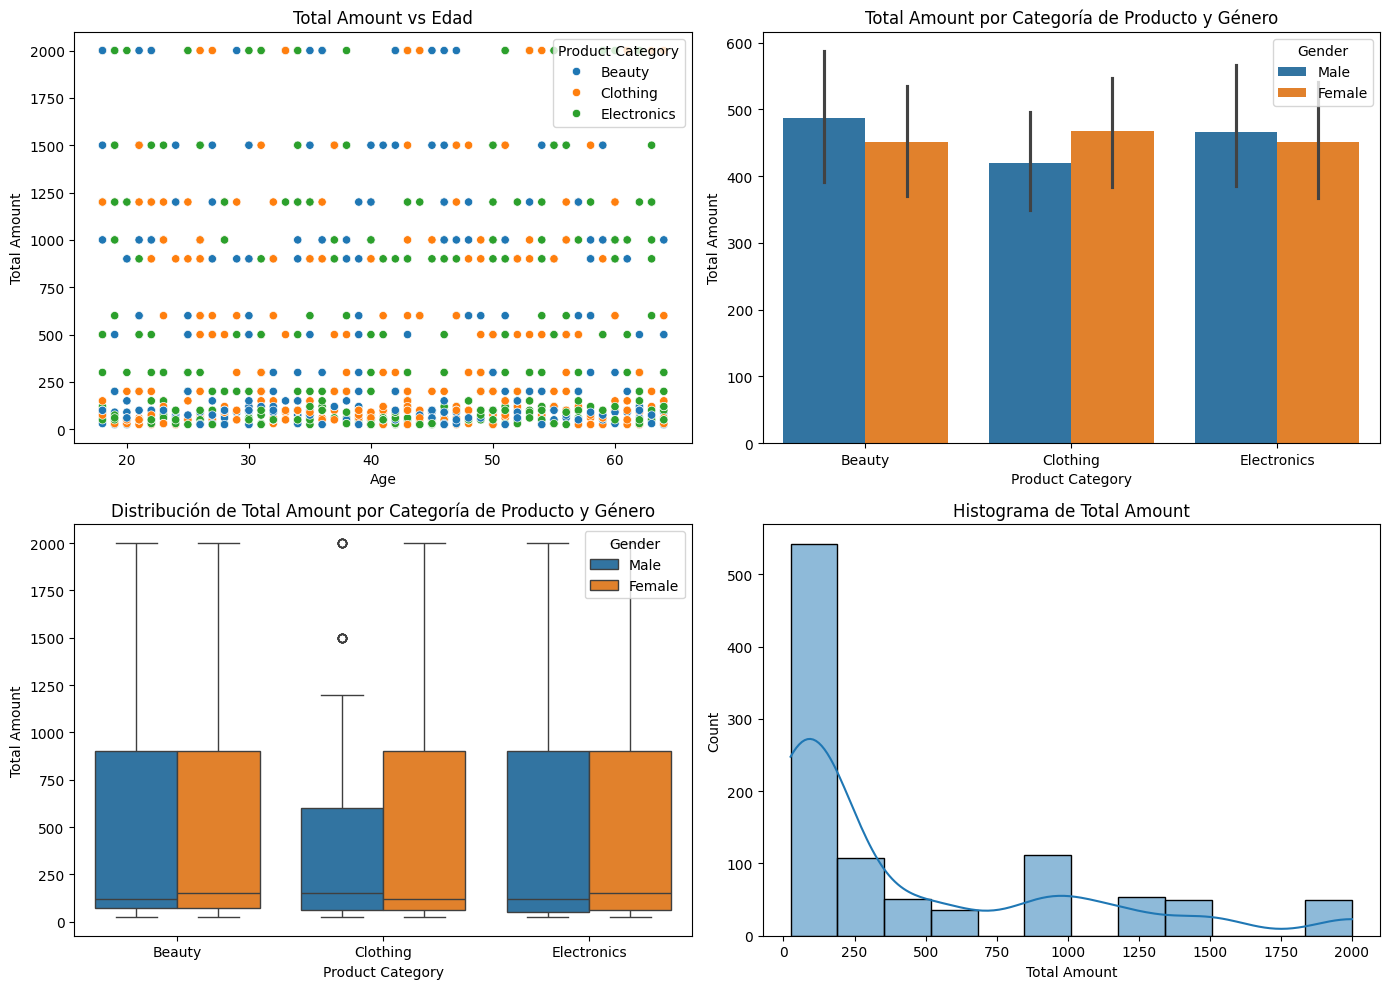

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
# Gráfico de dispersión
sns.scatterplot(data=df, x='Age', y='Total Amount', hue='Product Category', ax=axs[0, 0])
axs[0, 0].set_title('Total Amount vs Edad')
# Gráfico de barras
sns.barplot(data=df, x='Product Category', y='Total Amount', hue='Gender', ax=axs[0, 1])
axs[0, 1].set_title('Total Amount por Categoría de Producto y Género')
# Gráfico de cajas
sns.boxplot(data=df, x='Product Category', y='Total Amount', hue='Gender', ax=axs[1, 0])
axs[1, 0].set_title('Distribución de Total Amount por Categoría de Producto y Género')
# Histograma
sns.histplot(data=df, x='Total Amount', kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Histograma de Total Amount')
# Ajustar la posición de los subplots para evitar superposición
plt.tight_layout()
plt.show()

#### Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

Número de ventas con edad > 25: 831


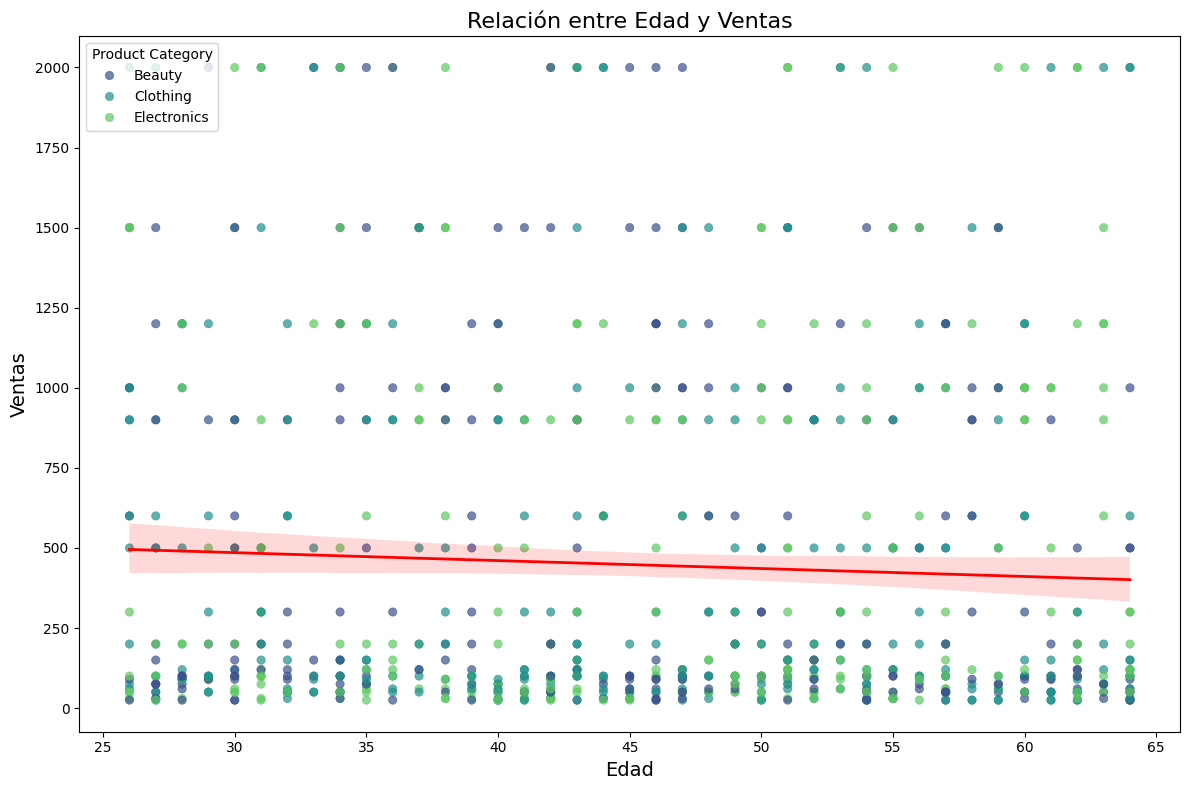

In [32]:
# Definir el umbral de ventas
umbral_edad = 25
df_filtrado = df[(df['Age'] > umbral_edad)]
# Mostrar cuántos ventas cumplen con el criterio
print(f"Número de ventas con edad > {umbral_edad}: {df_filtrado.shape[0]}")
df_scatter = df_filtrado[['Age', 'Total Amount', 'Product Category']].dropna()
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))
# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x='Age',
    y='Total Amount',
    data=df_scatter,
    hue='Product Category',
    palette='viridis',    # Esquema de colores
    alpha=0.7,            # Transparencia de los puntos
    edgecolor=None        # Sin borde en los puntos
)
# Añadir una línea de regresión
sns.regplot(
    x='Age',
    y='Total Amount',
    data=df_scatter,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)
# Añadir títulos y etiquetas
plt.title('Relación entre Edad y Ventas', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
# Ajustar el layout para evitar superposiciones
plt.tight_layout()
# Mostrar el gráfico
plt.show()

#### Análisis de datos agrupados.

Graficamos los totales de ventas

In [33]:
group_Total_Amount_by_category = df.groupby("Product Category")["Total Amount"].sum("Total Amount").reset_index().sort_values("Total Amount", ascending=False)

group_Total_Amount_by_category

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


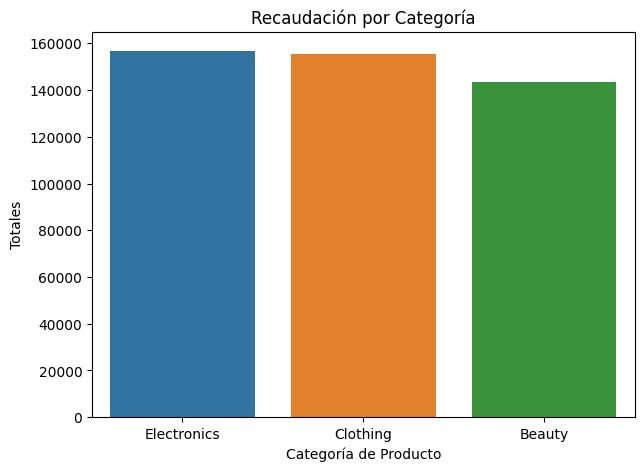

In [34]:
plt.figure(figsize=(7, 5))
sns.barplot(
    group_Total_Amount_by_category,
    x='Product Category',
    y='Total Amount',
    hue='Product Category',
)
plt.ylabel('Totales')
plt.xlabel("Categoría de Producto")
plt.title('Recaudación por Categoría')
plt.show()


Graficamos cantidades de ventas por categoría.

In [35]:
group_Total_Amount_by_category = df.groupby("Product Category")["Total Amount"].count().reset_index().sort_values("Total Amount", ascending=False)

group_Total_Amount_by_category

,Product Category,Total Amount
1,Clothing,351
2,Electronics,342
0,Beauty,307


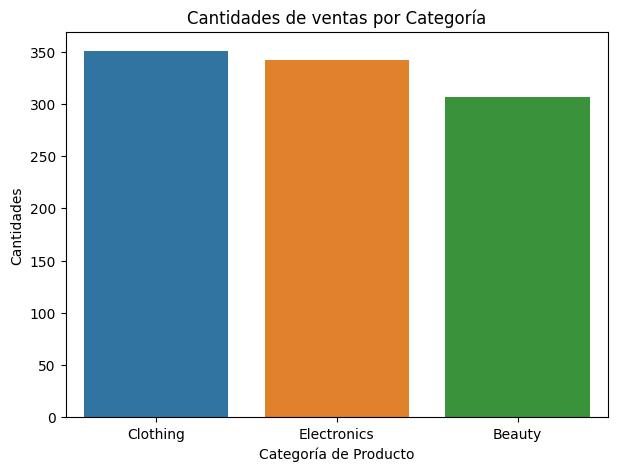

In [36]:
plt.figure(figsize=(7, 5))
sns.barplot(
    group_Total_Amount_by_category,
    x='Product Category',
    y='Total Amount',
    hue='Product Category',
)
plt.ylabel('Cantidades')
plt.xlabel("Categoría de Producto")
plt.title('Cantidades de ventas por Categoría')
plt.show()

In [37]:
group_Total_Amount_by_category_and_gender = df.groupby(
    by=["Product Category", "Gender"])[
        ["Total Amount"]
    ].sum("Total Amount").reset_index().sort_values(
        "Total Amount",
        ascending=False
    )

group_Total_Amount_by_category_and_gender

,Product Category,Gender,Total Amount
2,Clothing,Female,81275
5,Electronics,Male,80170
4,Electronics,Female,76735
0,Beauty,Female,74830
3,Clothing,Male,74305
1,Beauty,Male,68685


Graficamos totales por Categoría y Género

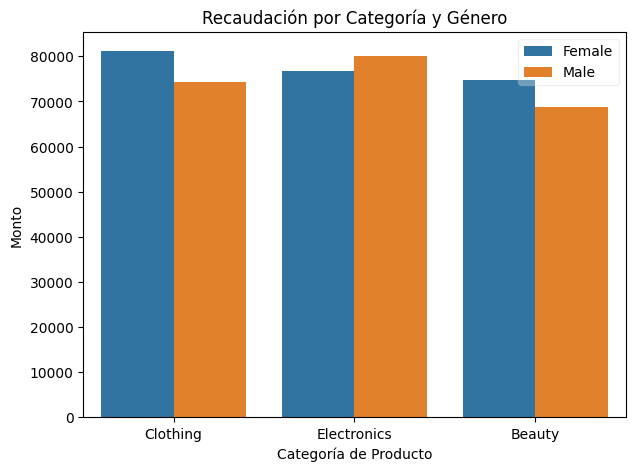

In [38]:
plt.figure(figsize=(7, 5))
sns.barplot(
    group_Total_Amount_by_category_and_gender,
    x='Product Category',
    y='Total Amount',
    hue='Gender',
)
plt.title("Recaudación por Categoría y Género")
plt.ylabel("Monto")
plt.xlabel("Categoría de Producto")
plt.legend(framealpha=0.3)
plt.show()

In [39]:
group_Total_Amount_count_by_category_and_gender_sorted = df.groupby(by=["Product Category", "Gender"])[["Total Amount"]].count().reset_index().sort_values("Total Amount", ascending=False)

group_Total_Amount_count_by_category_and_gender_sorted

,Product Category,Gender,Total Amount
3,Clothing,Male,177
2,Clothing,Female,174
5,Electronics,Male,172
4,Electronics,Female,170
0,Beauty,Female,166
1,Beauty,Male,141


Grafica de cantidades por Categoría y Género

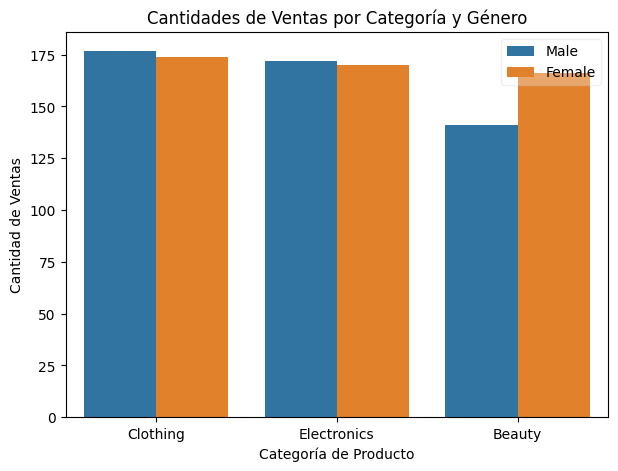

In [40]:
plt.figure(figsize=(7, 5))
sns.barplot(
    group_Total_Amount_count_by_category_and_gender_sorted,
    x='Product Category',
    y='Total Amount',
    hue='Gender',
)
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad de Ventas")
plt.title("Cantidades de Ventas por Categoría y Género")
plt.legend(framealpha=0.3)
plt.show()

Verificamos dispersiones de edad por categoria y genero

In [41]:
group_Total_Amount_count_by_category_and_age_sorted = df.groupby(
    by=["Age", "Product Category"])[["Total Amount"]].count().reset_index().sort_values(
        "Total Amount",
        ascending=False
    )

group_Total_Amount_count_by_category_and_age_sorted.head(10)

,Age,Product Category,Total Amount
101,51,Electronics,14
76,43,Clothing,13
84,46,Beauty,13
41,31,Electronics,13
139,64,Clothing,13
36,30,Beauty,12
48,34,Beauty,12
98,50,Electronics,12
77,43,Electronics,12
134,62,Electronics,12


Text(0, 0.5, 'Cant. de ventas')

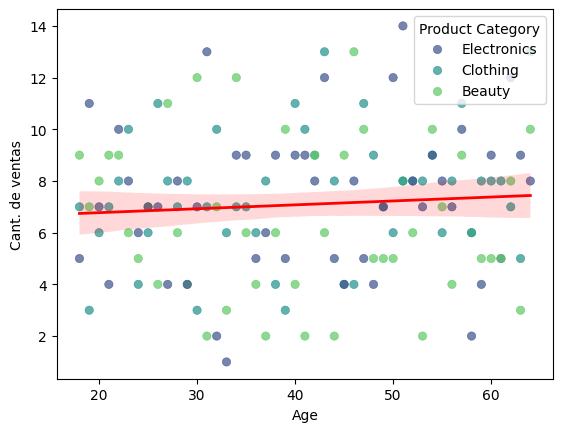

In [42]:
sns.scatterplot(
    x='Age',
    y='Total Amount',
    data=group_Total_Amount_count_by_category_and_age_sorted,
    hue='Product Category',
    palette='viridis',    # Esquema de colores
    alpha=0.7,            # Transparencia de los puntos
    edgecolor=None        # Sin borde en los puntos
)
# Añadir una línea de regresión
sns.regplot(
    x='Age',
    y='Total Amount',
    data=group_Total_Amount_count_by_category_and_age_sorted,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)
plt.ylabel("Cant. de ventas")

Repetimos el analisis pero por género.

In [43]:
group_Total_Amount_count_by_age_and_gender = df.groupby(
    by=["Age", "Gender"])[["Total Amount"]].count().reset_index().sort_values(
    "Total Amount",
    ascending=False
)

group_Total_Amount_count_by_age_and_gender.head(10)

,Age,Gender,Total Amount
92,64,Female,19
50,43,Female,19
73,54,Male,17
66,51,Female,17
27,31,Male,16
79,57,Male,16
56,46,Female,16
89,62,Male,16
48,42,Female,15
16,26,Female,15


<Axes: xlabel='Age', ylabel='Total Amount'>

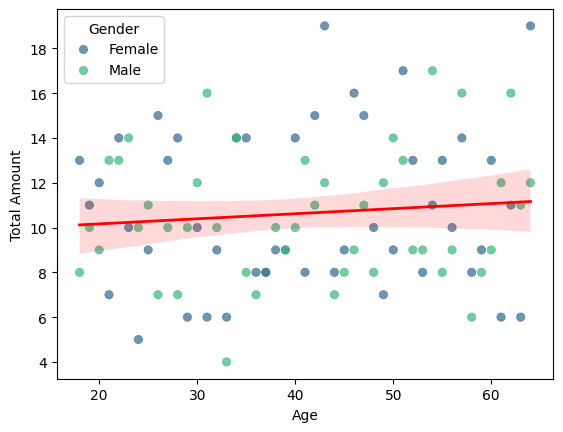

In [44]:
sns.scatterplot(
    x='Age',
    y='Total Amount',
    data=group_Total_Amount_count_by_age_and_gender,
    hue='Gender',
    palette='viridis',    # Esquema de colores
    alpha=0.7,            # Transparencia de los puntos
    edgecolor=None        # Sin borde en los puntos
)
# Añadir una línea de regresión
sns.regplot(
    x='Age',
    y='Total Amount',
    data=group_Total_Amount_count_by_age_and_gender,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)

In [45]:
df_agrupado_cant_edades_genero_categoria = df.groupby(
    by=["Age", "Gender", "Product Category"])[["Total Amount"]].count().reset_index().sort_values(
    "Total Amount",
    ascending=False
)

df_agrupado_cant_edades_genero_categoria.head()

,Age,Gender,Product Category,Total Amount
269,64,Female,Clothing,10
81,31,Male,Electronics,9
192,50,Male,Electronics,8
73,30,Male,Beauty,8
261,62,Male,Electronics,8


Graficamos boxplots para observar las distribuciones de ventas por categoría.

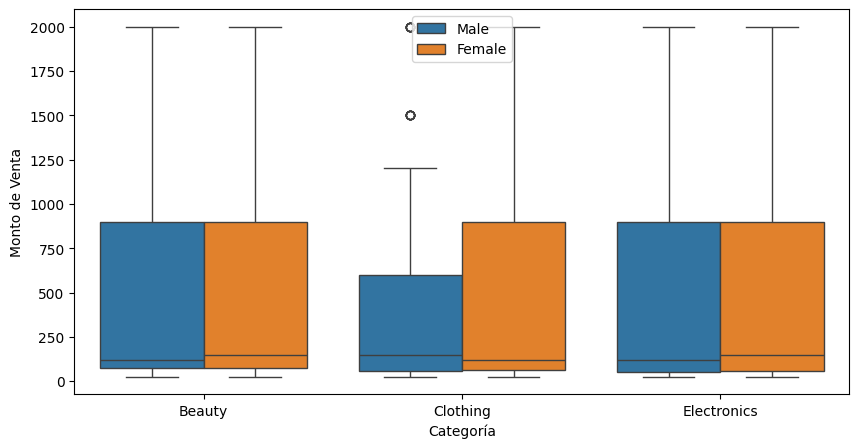

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    df,
    x="Product Category",
    y="Total Amount",
    hue="Gender",
)
plt.ylabel("Monto de Venta")
plt.xlabel("Categoría")
plt.legend()
plt.show()

Graficamos un histograma del total de ventas con rangos intercuartiles.

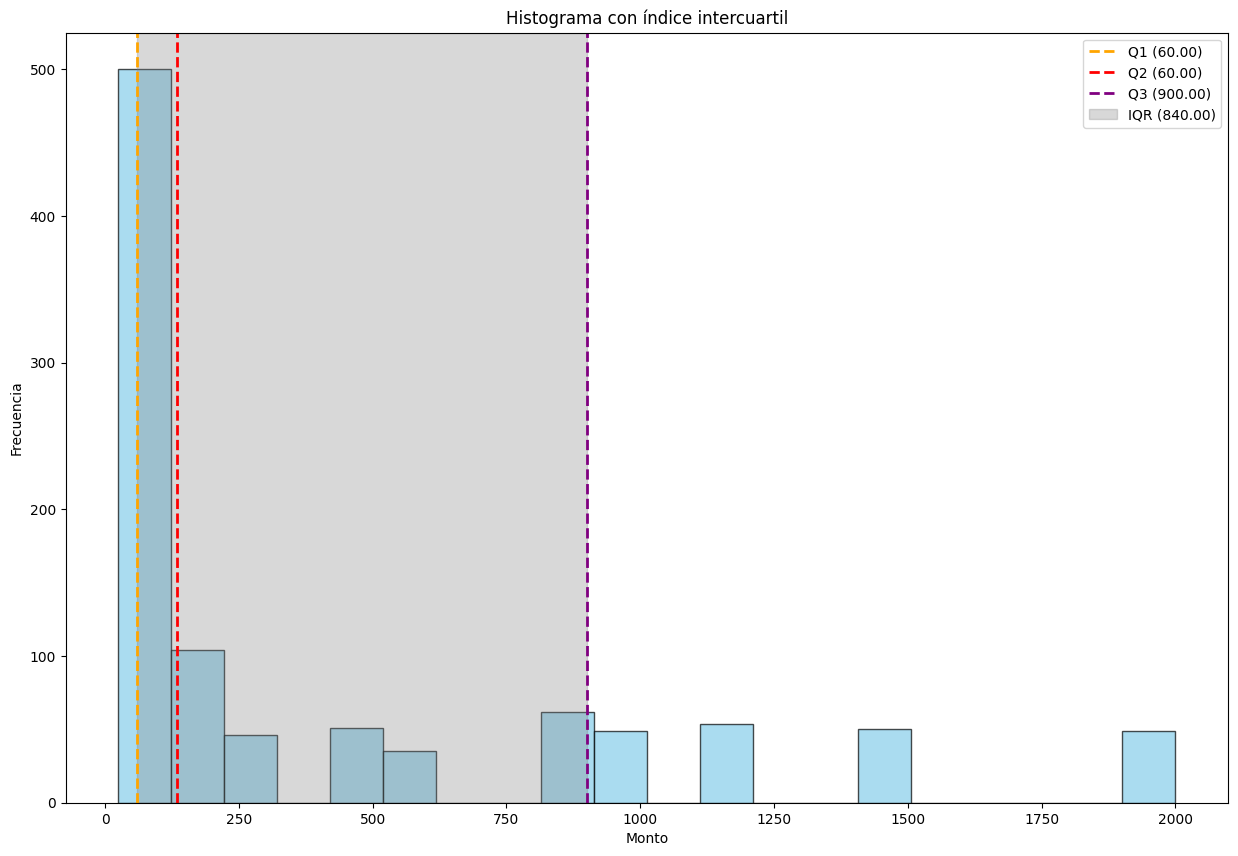

In [52]:
import numpy as np

Q1 = np.percentile(df["Total Amount"], 25)
Q2 = np.percentile(df["Total Amount"], 50)
Q3 = np.percentile(df["Total Amount"], 75)
IQR = Q3 - Q1

plt.figure(figsize=(15, 10))
plt.hist(df["Total Amount"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(Q1, color='orange', linestyle='dashed', linewidth=2, label=f'Q1 ({Q1:.2f})')
plt.axvline(Q2, color='red', linestyle='dashed', linewidth=2, label=f'Q2 ({Q1:.2f})')
plt.axvline(Q3, color='purple', linestyle='dashed', linewidth=2, label=f'Q3 ({Q3:.2f})')
plt.axvspan(Q1, Q3, color='gray', alpha=0.3, label=f'IQR ({IQR:.2f})')

plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.title('Histograma con índice intercuartil')
plt.legend()
plt.show()

Graficamos Ventas por Rango Etario.

In [55]:
def obtener_rango_etario(x):
    if 0 <= x < 18:
        return "0-18"

    if 18 <= x < 25:
        return "18-25"

    if 25 <= x < 40:
        return "25-40"

    if 40 <= x < 65:
        return "40-65"
    
    return "65+"


df["Age_Range"] = df["Age"].apply(obtener_rango_etario)

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Calculated Total Amount,Sale_Category,Age Classification,Total Amount Stdev Difference,Age_Range
0,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,1500,Alta,Adulto,940.002368,40-65
1,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,900,Media,Adulto,340.002368,40-65
2,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,1200,Media,Adulto,640.002368,40-65
3,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,90,Baja,Adulto Joven,469.997632,18-25
4,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,25,Baja,Adulto Joven,534.997632,18-25


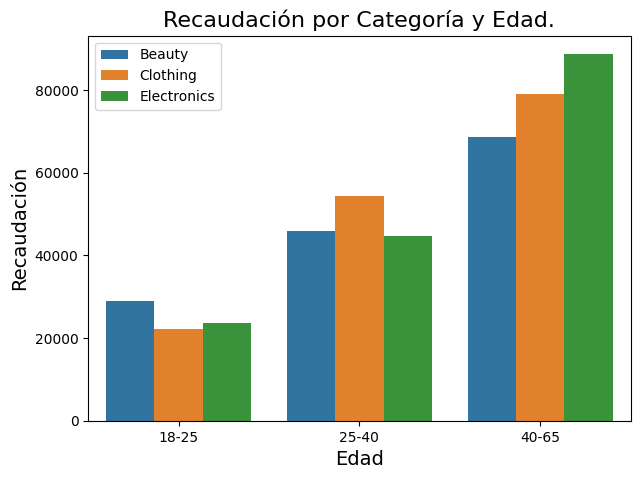

In [56]:
df_agrupado_sum_edades = df.groupby(
    by=["Product Category", "Age_Range"])[
        ["Total Amount"]
    ].sum("Total Amount").reset_index().sort_values(
        "Age_Range",
        ascending=True
    )

plt.figure(figsize=(7, 5))
sns.barplot(
    df_agrupado_sum_edades,
    x="Age_Range",
    y="Total Amount",
    hue="Product Category",
)
plt.title("Recaudación por Categoría y Edad.", fontsize=16)
plt.xlabel("Edad", fontsize=14)
plt.ylabel('Recaudación', fontsize=14)
plt.legend()
plt.show()

Graficamos también las cantidades de ventas por edad.

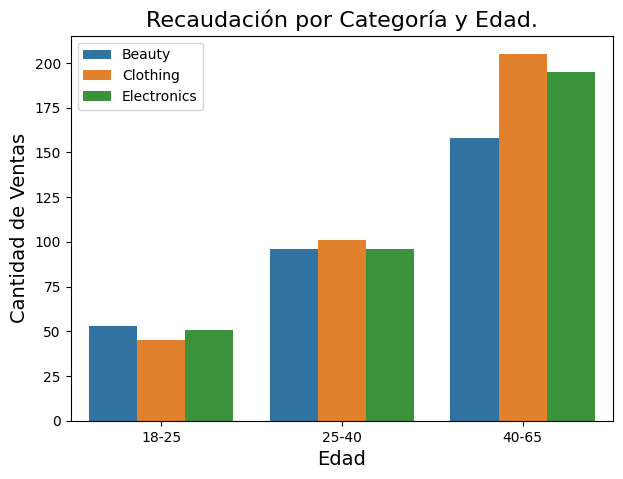

In [57]:
df_agrupado_cant_edades = df.groupby(
    by=["Product Category", "Age_Range"])[
        ["Total Amount"]
    ].count().reset_index().sort_values(
        "Age_Range",
        ascending=True
    )

plt.figure(figsize=(7, 5))
sns.barplot(
    df_agrupado_cant_edades,
    x="Age_Range",
    y="Total Amount",
    hue="Product Category",
)
plt.title("Recaudación por Categoría y Edad.", fontsize=16)
plt.xlabel("Edad", fontsize=14)
plt.ylabel('Cantidad de Ventas', fontsize=14)
plt.legend()
plt.show()